*Veuillez parcourir le module sur la régression linéaire avant de commencer avec ce notebook.*

## Intuition de régression linéaire
Avant de plonger dans la technique actuelle de la régression linéaire, examinons-en une intuition.

Disons que je vous donne le puzzle suivant:

Étant donné les valeurs suivantes de X et Y, quelle est la valeur de Y lorsque X = 5.

(1,1), (2,2), (4,4), (100,100), (20, 20)

La réponse est: 5. Pas très difficile, non?

Voyons maintenant un autre exemple. Disons que vous avez les paires suivantes de X et Y. Pouvez-vous calculer la valeur de Y, lorsque X = 5?

(1,1), (2,4), (4,16), (100,10000), (20, 400)

La réponse est: 25. Cela a-t-il été difficile?

Comprenons un peu ce qui s’est passé dans les exemples ci-dessus.

Quand on regarde le premier exemple, après avoir regardé les paires données, on peut établir que la relation entre X et Y est Y = X.

De même, dans le deuxième exemple, la relation est Y = X * X.

Dans ces deux exemples, nous pouvons déterminer la relation entre deux variables données (X et Y) car nous pourrions facilement identifier la relation entre elles. Dans l'ensemble, l'apprentissage automatique fonctionne de la même manière.

Votre ordinateur examine quelques exemples puis essaie d'identifier la relation «la plus appropriée» entre les ensembles X et Y. En utilisant cette relation identifiée, il essaiera de prédire (ou plus) de nouveaux exemples pour lesquels vous ne connaissez pas Y.

En gardant à l'esprit l'idée ci-dessus, je vais essayer d'expliquer ce qu'est la régression linéaire.

## Régression
La régression est généralement désignée comme la détermination des relations entre deux ou plusieurs variables.

Par exemple, dans les deux exemples ci-dessus, X et Y sont les variables. **X** est appelé **variable indépendante** et **Y** est appelé **variable dépendante** (car sa valeur est calculée à l'aide de X).
De plus, Y a une plage continue (contrairement à la classification où Y est discret).

## Régression linéaire / Régression linéaire simple
La régression linéaire simple (SLR) est qualifiée de simple car il existe la seule variable indépendante.

Supposons que nous ayons un ensemble de données contenant des informations sur la relation entre «Années d'expérience» et «Salaire» dans un domaine de travail particulier.

La **variable dépendante pourrait représenter le salaire**. Vous pouvez supposer que ce niveau d'expérience aura un impact sur le salaire. Ainsi, vous étiqueteriez la **variable indépendante comme expérience**.

Représentant l'expérience avec la variable x et le salaire avec y, nous pouvons dire que y ∝ x. (y est proportionnel à x).





---


Cependant, un changement de x ne signifie généralement pas un changement égal de y.

Le **coefficient** peut être considéré comme un **multiplicateur qui relie les variables indépendantes et dépendantes.** Il traduit combien y sera affecté par un changement d'unité de x.

Ajoutons un coefficient b1 à notre exemple.

On obtient ainsi y = b1 * x

Désormais, les salaires dans un emploi particulier commencent toujours par le montant de base ou le salaire le plus bas possible. Nous devons donc prendre cette constante en considération.

La constante b0 serait le salaire de départ d'une personne ayant un niveau d'expérience nul. En supposant que chaque frais de l'entreprise reçoive 30K comme salaire de départ, nous pouvons le fixer comme prix de base.

Enfin, nous avons:

Salaire = b0 + b1 * Expérience

ou

y = b0 + b1 * x

Ceci est similaire à l'équation d'une ligne droite y = m * x + c

![Equation](https://miro.medium.com/max/1400/1*MgZkzHNM6lNTtrfhV6SRcA.png)

Mettons notre théorie en pratique maintenant!

## Objectif
L'objectif est d'utiliser la régression linéaire pour comprendre l'impact des années d'expérience sur le salaire.

In [ ]:
# importing packages
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise

In [ ]:
#Loading the salary dataset
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Linear_Regression_Introduction/master/Salary_Data.csv')

In [ ]:
#Let's have a look at what our data is like
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Tracer les données

Tracons nos points de données sur un graphique 2D pour observer notre ensemble de données (obtenir un aperçu approximatif) et voir si nous pouvons trouver manuellement une relation entre les données.

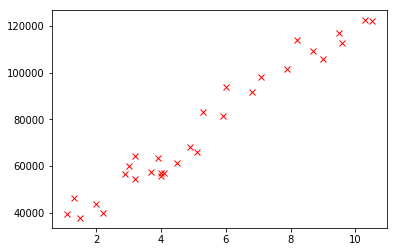

In [ ]:
# Scatter plot helps in visualising the data distribution
plt.plot(data.YearsExperience, data.Salary,'rx')

Comme vous pouvez le voir, il existe une relation claire entre les années d'expérience et le salaire.

# Définition des variables
Notre prochaine étape consiste à diviser les données en «attributs» et «étiquettes» ou comme vous l'avez déjà appelé variables d'entrée et de cible.

Dans notre ensemble de données, nous n'avons que deux colonnes. Nous voulons prédire le salaire en fonction des années d'expérience enregistrées. Par conséquent, notre ensemble d'attributs sera composé de la colonne «YearsExperience» qui est stockée dans la variable X, et le libellé sera la colonne «Salary» qui est stockée dans la variable y.

In [ ]:
X = data[['YearsExperience']]
y = data['Salary']

Si vous vous demandez pourquoi un X majuscule est utilisé pour les fonctionnalités et un y minuscule pour les étiquettes, cela est principalement dû à la convention.

# Fractionner les données

Ensuite, nous avons divisé 80% des données dans l'ensemble d'apprentissage tandis que 20% des données dans l'ensemble de test en utilisant le code ci-dessous.
La variable test_size est l'endroit où nous spécifions en fait la proportion de l'ensemble de test.

En contournant nos variables X et y dans la méthode train_test_split, nous sommes en mesure de capturer les fractionnements dans les données en affectant 4 variables au résultat.

In [ ]:
# import SK Learn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Comprendre le fonctionnement de la régression linéaire

Le terme «linéarité» en algèbre fait référence à une relation linéaire entre deux ou plusieurs variables. Si nous dessinons cette relation dans un espace bidimensionnel (entre deux variables), nous obtenons une ligne droite.

Si nous traçons la variable indépendante (x) sur l'axe des x et la variable dépendante (y) sur l'axe des y, la régression linéaire nous donne une ligne droite qui «correspond le mieux» aux points de données. Il est impossible de relier toutes les marques avec une ligne droite, vous utilisez donc la ligne la mieux adaptée.

L'équation pour cette ligne serait le résultat de votre régression linéaire simple (Rappelez-vous l'équation y = b0 + b1 * x que nous venons de dériver?). La régression trouve la meilleure droite d'ajustement.

Maintenant, comment trouvez-vous la meilleure ligne de montage? Puisque nos points de données (valeurs de x et y) resteront constants pour un ensemble de données particulier, nous ne pouvons modifier que b0 et b1.

**Notre objectif est de trouver les valeurs de b0 et b1 qui correspondent le mieux à ces données.**

Ces 2 variables / coefficients sont en fait appelés ** hyperparamètres **. Dans l'apprentissage automatique, un hyperparamètre est un paramètre dont la valeur est utilisée pour contrôler le processus d'apprentissage. Et nous devons toujours essayer de trouver des paramètres optimaux lors de la construction d'un modèle d'apprentissage automatique.

Cette ligne est votre **modèle de régression**.

Pour effectuer rapidement une régression linéaire, nous utiliserons la bibliothèque scikit-learn. Si vous ne l'avez pas déjà, vous pouvez l'installer à l'aide de pip:


```
pip install scikit-learn 
```



# Former notre modèle

Après avoir divisé les données en ensembles d'entraînement et de test, enfin, il est temps de former notre algorithme. Tout d'abord, l'importation de ```sklearn.linear_model``` est nécessaire pour accéder à ```LinearRegression```. Il doit ensuite être instancié et adapté au modèle pour nos données d'entraînement. Ceci est vu ci-dessous.

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_regressor = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
linear_regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Interprétation des coefficients
Les coefficients (b0 et b1) nous permettront de modéliser notre équation avec des valeurs et de trouver la meilleure droite d'ajustement. La variable linear_regressor (affectée à un objet LinearRegression), peut extraire l'interception et les coefficients, en utilisant le code ci-dessous.

In [ ]:
# prints y-intercept
print(linear_regressor.intercept_)

# prints the coefficient
print(linear_regressor.coef_)

25789.060767971714
[9479.09167874]


L'interception sera votre valeur b0; et le coefficient sera b1.

# Faire des prédictions basées sur votre modèle
Maintenant que nous avons formé notre algorithme, il est temps de faire des prédictions. Pour ce faire, nous utiliserons nos données de test et verrons avec quelle précision notre algorithme prédit les salaires.

Faire des prédictions basées sur votre modèle est aussi simple que d'utiliser le code ci-dessous: en passant la méthode de prédiction à vos données de test. Cela renverra les valeurs prévues de y étant donné les nouvelles données de test X.

In [ ]:
y_pred = linear_regressor.predict(X_test)  # make predictions

Nous avons nos prédictions dans y_pred. Maintenant, visualisons l'ensemble de données et la ligne de régression avec les données de test:

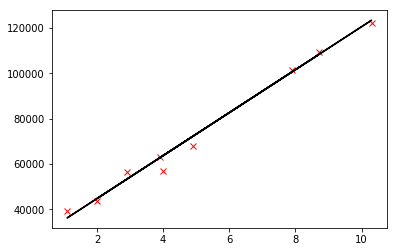

In [ ]:
plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

Comme vous pouvez le voir, l'algorithme a tracé une ligne qui passe par les points de données de test maximum et a la distance minimale des autres. Cette ligne est connue sous le nom de «meilleur ajustement» ou ligne de régression.

Puisque cette ligne a une pente positive, on peut dire que le salaire augmente comme non. d’années d’expérience augmentent.

![Simple Linear Regression](https://i0.wp.com/brokerstir.com/wp-content/uploads/2018/03/simple_linear_2.png)

En utilisant cette ligne, vous pouvez même calculer les salaires pour les années d'expérience non présentes dans l'ensemble de données en trouvant la valeur correspondante de y sur la ligne.

![Prediction](https://miro.medium.com/max/1400/1*ANtsE4kMZDAqueFPVk1jmg.jpeg)

# Évaluation du modèle
Trois mesures principales sont utilisées pour évaluer les modèles linéaires. Ce sont: l'erreur absolue moyenne (MAE), l'erreur quadratique moyenne (MSE) ou l'erreur quadratique moyenne (RMSE).

In [ ]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

2450.548521354496
9961725.246016478
3156.220088336122


Nous discuterons bientôt de chacune de ces métriques / paramètres de performance.

Toutes nos félicitations! Vous avez réussi votre objectif et créé votre propre modèle de régression linéaire.